# Linear Transformations and Neural Networks
# Outline
- [ 1 - Introduction](#1)
  - [ 1.1 - Transformations](#1.1)
  - [ 1.2 - Linear Transformations](#1.2)
  - [ 1.3 - Transformations Defined as a Matrix Multiplication](#1.3)
- [ 2 - Standard Transformations in a Plane](#2)
  - [ 2.1 - Horizontal Scaling (Dilation)](#2.1)
  - [ 2.2 - Example 2: Reflection about y-axis (the vertical axis)](#2.2)
  - [ 2.3 Stretching by a scalar](#2.3)
    - [ Exercise 1](#ex01)
  - [ 2.4 Horizontal shear transformation](#2.4)
    - [ Exercise 2](#ex02)
  - [ 2.5 Rotation](#2.5)
    - [ Exercise 3](#ex03)
    - [ Exercise 4](#ex04)
- [ 3 - Neural Networks](#3)
  - [ 3.1 - Linear Regression](#3.1)
  - [ 3.2 - Neural Network Model with a Single Perceptron and Two Input Nodes](#3.2)
  - [ 3.3 Parameters of the Neural Network](#3.3)
  - [ 3.4 Forward propagation](#3.4)
    - [ Exercise 5](#ex05)
  - [ 3.5 Defining the cost function](#3.5)
    - [ Exercise 6](#ex06)
  - [ 3.6 - Training the neural network](#3.6)
- [ 4 - Make your predictions!](#4)
  - [ Exercise 7](#ex07)


Welcome to the third assignment of the Linear Algebra course! 

This assignment explores the foundational concepts of linear transformations and neural networks in two distinct parts. In the first section, we delve into linear transformations by creating functions to generate matrices for stretching, shearing, and rotation operations. The second part shifts the focus to neural networks, specifically implementing forward propagation in a simple architecture with two inputs and one perceptron. By dissecting these fundamental components, this assignment aims to provide a clear understanding of the role of linear algebra in both vector transformations and neural network computations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils

In [2]:
import w3_unittest

<a name="1"></a>
## 1 - Introduction

<a name="1.1"></a>
### 1.1 - Transformations

A **transformation** is a function from one vector space to another that respects the underlying (linear) structure of each vector space. Referring to a specific transformation, you can use a symbol, such as $T$. Specifying the spaces containing the input and output vectors, e.g. $\mathbb{R}^2$ and $\mathbb{R}^3$, you can write $T: \mathbb{R}^2 \rightarrow \mathbb{R}^3$. Transforming vector $v \in \mathbb{R}^2$ into the vector $w\in\mathbb{R}^3$ by the transformation $T$, you can use the notation $T(v)=w$ and read it as "*T of v equals to w*" or "*vector w is an **image** of vector v with the transformation T*".

The following Python function corresponds to the transformation $T: \mathbb{R}^2 \rightarrow \mathbb{R}^3$ with the following symbolic formula:

$$T\begin{pmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}\end{pmatrix}=
          \begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix}
          \tag{1}
          $$

In [3]:
def T(v):
    w = np.zeros((3,1))
    w[0,0] = 3*v[0,0]
    w[2,0] = -2*v[1,0]
    
    return w

v = np.array([[3], [5]])
w = T(v)

print("Original vector:\n", v, "\n\n Result of the transformation:\n", w)

Original vector:
 [[3]
 [5]] 

 Result of the transformation:
 [[  9.]
 [  0.]
 [-10.]]


<a name="1.2"></a>
### 1.2 - Linear Transformations

A transformation $T$ is said to be **linear** if the following two properties are true for any scalar $k$, and any input vectors $u$ and $v$:

1. $T(kv)=kT(v)$,
2. $T(u+v)=T(u)+T(v)$.

In the example above $T$ is a linear transformation:

$$T (kv) =
          T \begin{pmatrix}\begin{bmatrix}
          kv_1 \\
          kv_2
          \end{bmatrix}\end{pmatrix} = 
          \begin{bmatrix}
           3kv_1 \\
           0 \\
           -2kv_2
          \end{bmatrix} =
          k\begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix} = 
          kT(v),\tag{2}$$
          
$$T (u+v) =
          T \begin{pmatrix}\begin{bmatrix}
          u_1 + v_1 \\
          u_2 + v_2
          \end{bmatrix}\end{pmatrix} = 
          \begin{bmatrix}
           3(u_1+v_1) \\
           0 \\
           -2(u_2+v_2)
          \end{bmatrix} = 
          \begin{bmatrix}
           3u_1 \\
           0 \\
           -2u_2
          \end{bmatrix} +
          \begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix} = 
          T(u)+T(v).\tag{3}$$

You can change the values of $k$ or vectors $u$ and $v$ in the cell below, to check that this is true for some specific values.

In [4]:
u = np.array([[1], [-2]])
v = np.array([[2], [4]])

k = 7

print("T(k*v):\n", T(k*v), "\n k*T(v):\n", k*T(v), "\n\n")
print("T(u+v):\n", T(u+v), "\n\n T(u)+T(v):\n", T(u)+T(v))

T(k*v):
 [[ 42.]
 [  0.]
 [-56.]] 
 k*T(v):
 [[ 42.]
 [  0.]
 [-56.]] 


T(u+v):
 [[ 9.]
 [ 0.]
 [-4.]] 

 T(u)+T(v):
 [[ 9.]
 [ 0.]
 [-4.]]


<a name="1.3"></a>
### 1.3 - Transformations Defined as a Matrix Multiplication

Let $L: \mathbb{R}^m \rightarrow \mathbb{R}^n$ be defined by a matrix $A$, where $L(v)=Av$, multiplication of the matrix $A$ ($n\times m$) and vector $v$ ($m\times 1$) resulting in the vector $w$ ($n\times 1$).

Now try to guess, what should be the elements of matrix $A$, corresponding to the transformation $L: \mathbb{R}^2 \rightarrow \mathbb{R}^3$:

$$L\begin{pmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}\end{pmatrix}=
          \begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix}=
          \begin{bmatrix}
           ? & ? \\
           ? & ? \\
           ? & ?
          \end{bmatrix}
          \begin{bmatrix}
           v_1 \\
           v_2
          \end{bmatrix}
          \tag{4}
          $$

To do that, write the transformation $L$ as $Av$ and then perform matrix multiplication:
    $$L\begin{pmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}\end{pmatrix}=
          A\begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}=
          \begin{bmatrix}
           a_{1,1} & a_{1,2} \\
           a_{2,1} & a_{2,2} \\
           a_{3,1} & a_{3,2}
          \end{bmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}=
          \begin{bmatrix}
           a_{1,1}v_1+a_{1,2}v_2 \\
           a_{2,1}v_1+a_{2,2}v_2 \\
           a_{3,1}v_1+a_{3,2}v_2 \\
          \end{bmatrix}=
          \begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix}\tag{5}
          $$
          
Can you see now what should be the values of the elements $a_{i,j}$ of matrix $A$ to make the equalities $(5)$ correct? Find out the answer in the following code cell:

In [5]:
def L(v):
    A = np.array([[3,0], [0,0], [0,-2]])
    print("Transformation matrix:\n", A, "\n")
    w = A @ v
    
    return w

v = np.array([[3], [5]])
w = L(v)

print("Original vector:\n", v, "\n\n Result of the transformation:\n", w)

Transformation matrix:
 [[ 3  0]
 [ 0  0]
 [ 0 -2]] 

Original vector:
 [[3]
 [5]] 

 Result of the transformation:
 [[  9]
 [  0]
 [-10]]


<a name="2"></a>
## 2 - Standard Transformations in a Plane

As discussed above in section [1](#1), a linear transformation $L: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ can be represented as a multiplication of a $2 \times 2$ matrix and a coordinate vector $v\in\mathbb{R}^2.$ Note that so far you have been using some random vector $v\in\mathbb{R}^2.$ (e.g. $v=\begin{bmatrix}3 \\ 5\end{bmatrix}$). To have a better intuition of what the transformation is really doing in the $\mathbb{R}^2$ space, it is wise to choose vector $v$ in a less random way. 

A good choice would be vectors of a standard basis $e_1=\begin{bmatrix}1 \\ 0\end{bmatrix}$ and $e_2=\begin{bmatrix}0 \\ 1\end{bmatrix}$. Let's apply linear transformation $L$ to each of the vectors $e_1$ and $e_2$: $L(e_1)=Ae_1$ and $L(e_2)=Ae_2$. If you put vectors $\{e_1, e_2\}$ into columns of a matrix and perform matrix multiplication

$$A\begin{bmatrix}e_1 & e_2\end{bmatrix}=\begin{bmatrix}Ae_1 & Ae_2\end{bmatrix}=\begin{bmatrix}L(e_1) & L(e_2)\end{bmatrix},\tag{3}$$

you can note that $\begin{bmatrix}e_1 & e_2\end{bmatrix}=\begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}$ (identity matrix). Thus, $A\begin{bmatrix}e_1 & e_2\end{bmatrix} = AI=A$, and

$$A=\begin{bmatrix}L(e_1) & L(e_2)\end{bmatrix}.\tag{4}$$

This is a matrix with the columns that are the images of the vectors of the standard basis. 

This choice of vectors \{$e_1, e_2$\} provides opportinuty for the visual representation of the linear transformation $L$ (you will see the examples below).

You will work with an image where you will see every transformation working in practice. Since an image is just a set of points in the plane, you can work with it as a set of vectors and you can stretch them, rotate them and much more! 

In [6]:
img = np.loadtxt('data/image.txt')
print('Shape: ',img.shape)
print(img)

Shape:  (2, 329076)
[[ 399.20891527  400.20891527  404.20891527 ...  -88.79108473
   -88.79108473  -88.79108473]
 [ 534.18310664  534.18310664  534.18310664 ... -476.81689336
  -477.81689336 -478.81689336]]


The image is just a $2 \times 329076$ matrix where each column is a vector in the plane. So you can get all $x$ coordinates by calling `img[0]` and all $y$ coordinates by calling `img[1]`. Now let's plot the image!

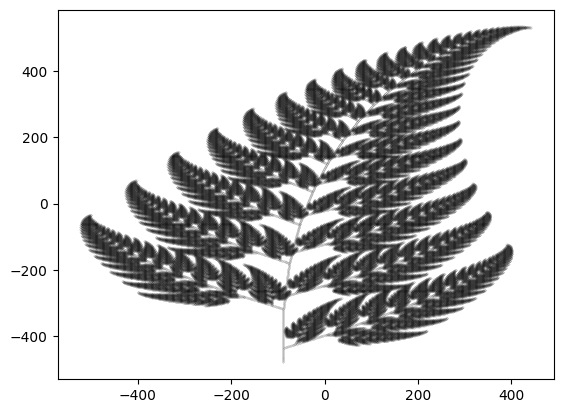

In [7]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black')

<a name="2.1"></a>
### 2.1 - Horizontal Scaling (Dilation)

Horizontal scaling (factor $2$ in this example) can be defined considering transformation of a vector $e_1=\begin{bmatrix}1 \\ 0\end{bmatrix}$ into a vector $\begin{bmatrix}2 \\ 0\end{bmatrix}$ and leaving vector $e_2=\begin{bmatrix}0 \\ 1\end{bmatrix}$ without any changes. The following function `T_hscaling()` corresponds to the horizontal scaling (factor $2$) of a vector. The second function `transform_vectors()` applies defined transformation to a set of vectors (here two vectors).

In [8]:
def T_hscaling(v):
    A = np.array([[2,0], [0,1]])
    w = A @ v
    
    return w
    
    
def transform_vectors(T, v1, v2):
    V = np.hstack((v1, v2))
    W = T(V)
    
    return W
    
e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

transformation_result_hscaling = transform_vectors(T_hscaling, e1, e2)

print("Original vectors:\n e1= \n", e1, "\n e2=\n", e2, 
      "\n\n Result of the transformation (matrix form):\n", transformation_result_hscaling)

Original vectors:
 e1= 
 [[1]
 [0]] 
 e2=
 [[0]
 [1]] 

 Result of the transformation (matrix form):
 [[2 0]
 [0 1]]


You can get a visual understanding of the transformation, producing a plot which displays input vectors, and their transformations. We have written this function for you so, so do not need to worry! Just run the next cell.

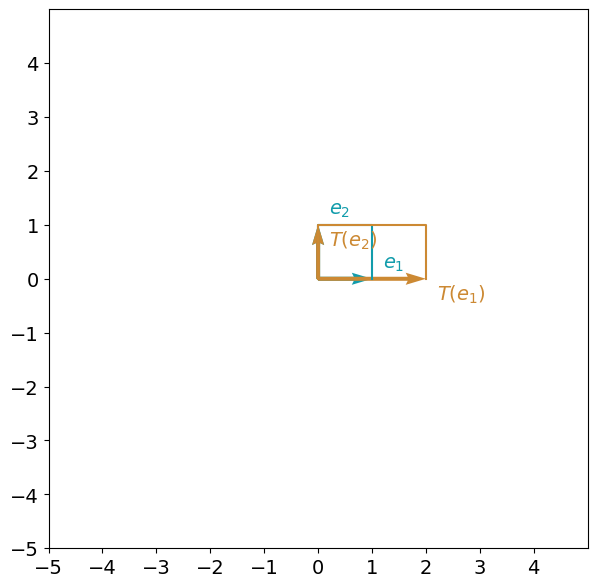

In [9]:
utils.plot_transformation(T_hscaling,e1,e2)

Let's visualize how it acts in our leaf image.

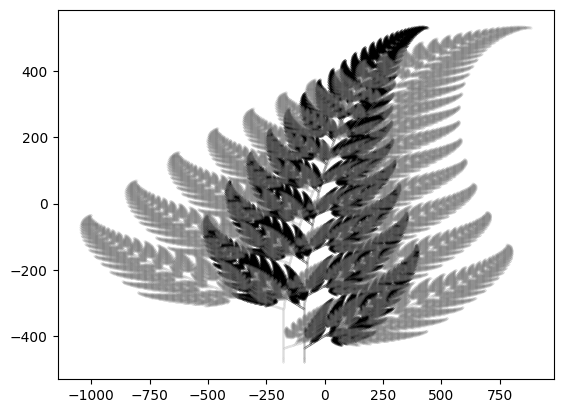

In [10]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black') 
plt.scatter(T_hscaling(img)[0], T_hscaling(img)[1], s = 0.001, color = 'grey')

Note that the transformed image (grey) is stretched!

<a name="2.2"></a>
### 2.2 - Example 2: Reflection about y-axis (the vertical axis)

Function `T_reflection_yaxis()` defined below corresponds to the reflection about y-axis:

In [11]:
def T_reflection_yaxis(v):
    A = np.array([[-1,0], [0,1]])
    w = A @ v
    
    return w
    
e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

transformation_result_reflection_yaxis = transform_vectors(T_reflection_yaxis, e1, e2)

print("Original vectors:\n e1= \n", e1,"\n e2=\n", e2, 
      "\n\n Result of the transformation (matrix form):\n", transformation_result_reflection_yaxis)

Original vectors:
 e1= 
 [[1]
 [0]] 
 e2=
 [[0]
 [1]] 

 Result of the transformation (matrix form):
 [[-1  0]
 [ 0  1]]


You can visualize this transformation:

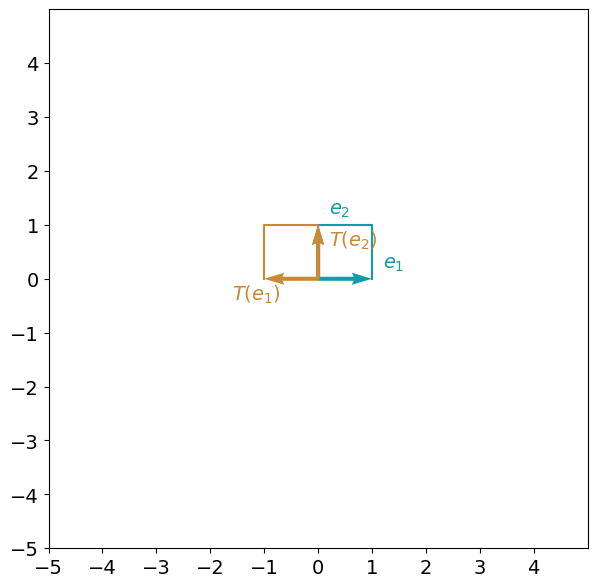

In [12]:
utils.plot_transformation(T_reflection_yaxis, e1, e2)

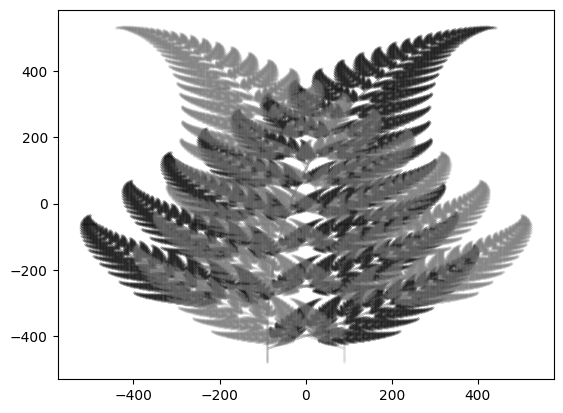

In [13]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black') 
plt.scatter(T_reflection_yaxis(img)[0], T_reflection_yaxis(img)[1], s = 0.001, color = 'grey')

<a name="2.3"></a>
### 2.3 Stretching by a scalar

The next linear transformation you will work is a stretching by a non-zero scalar. In other words, fixing a scalar $a \neq 0$, the linear transformation in the plane is such that:

$$T(v) = a \cdot v$$

If $v = (x,y)$, then $T(v) = T((x,y)) = (ax, ay)$.


<a name="ex01"></a>
### Exercise 1

In the following exercise, you will write a function that inputs a non-zero scalar $a$ and a vector $v$ and stretches $v$ in a factor of $a$ in the plane. 

**Hint**: To find the matrix, you may proceed as you just saw above: try checking the result in the *special* vectors $e_1 = (1,0)$ and $e_2 = (0,1)$!


In [14]:
# GRADED FUNCTION: T_stretch

def T_stretch(a, v):
    """
    Performs a 2D stretching transformation on a vector v using a stretching factor a.

    Args:
        a (float): The stretching factor.
        v (numpy.array): The vector (or vectors) to be stretched.

    Returns:
        numpy.array: The stretched vector.
    """

    ### START CODE HERE ###
    # Define the transformation matrix
    T = np.array([[a,0], [0,a]])
    
    # Compute the transformation
    w = T @ v
    ### END CODE HERE ###

    return w

In [15]:
w3_unittest.test_T_stretch(T_stretch)

 All tests passed


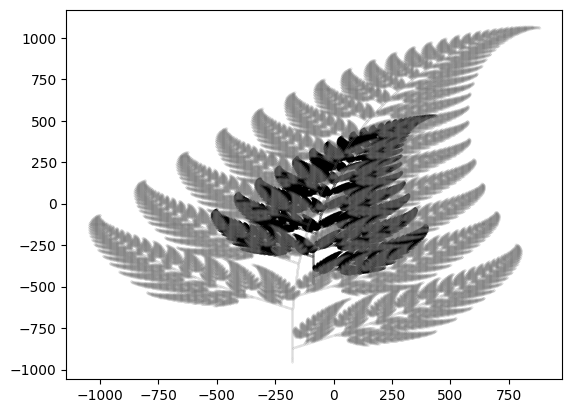

In [16]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black') 
plt.scatter(T_stretch(2,img)[0], T_stretch(2,img)[1], s = 0.001, color = 'grey')

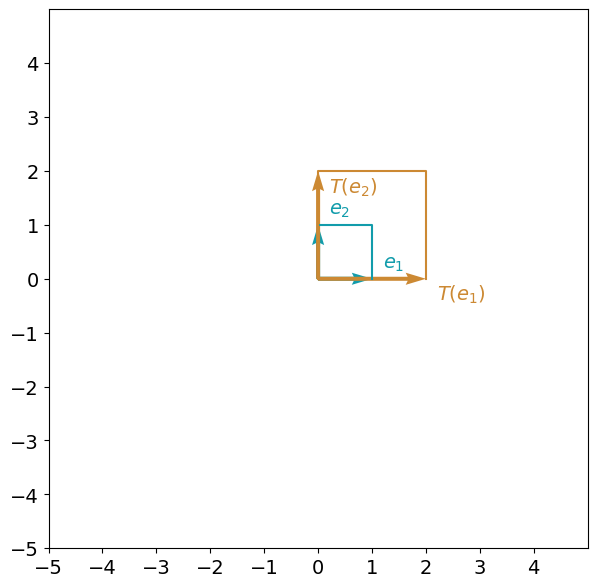

In [17]:
utils.plot_transformation(lambda v: T_stretch(2, v), e1,e2)

<a name="2.4"></a>
### 2.4 Horizontal shear transformation

The horizontal shear transformation with parameter $m$ is a transformation that maps a point $(x,y)$ in the plane to $(x + my, y)$. In other words,

$$T((x,y)) = (x+my, y)$$

<a name="ex02"></a>
### Exercise 2

You will implement a function `T_hshear` that inputs a scalar $m$ and a vector $v$, and performs the transformation mentioned above. 

**Hint**: To find the associated matrix you may want to understand what happens with the vectors $e_1 = (1,0)$ and $e_2 = (0,1)$.

In [18]:
# GRADED FUNCTION: T_hshear

def T_hshear(m, v):
    """
    Performs a 2D horizontal shearing transformation on an array v using a shearing factor m.

    Args:
        m (float): The shearing factor.
        v (np.array): The array to be sheared.

    Returns:
        np.array: The sheared array.
    """

    ### START CODE HERE ###
    # Define the transformation matrix
    T = np.array([[1,m], [0,1]])
    
    # Compute the transformation
    w = T @ v
    
    ### END CODE HERE ###
    
    return w

In [19]:
w3_unittest.test_T_hshear(T_hshear)

 All tests passed


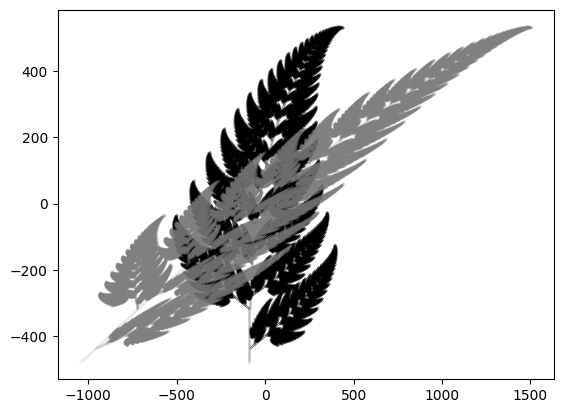

In [20]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black') 
plt.scatter(T_hshear(2,img)[0], T_hshear(2,img)[1], s = 0.001, color = 'grey')

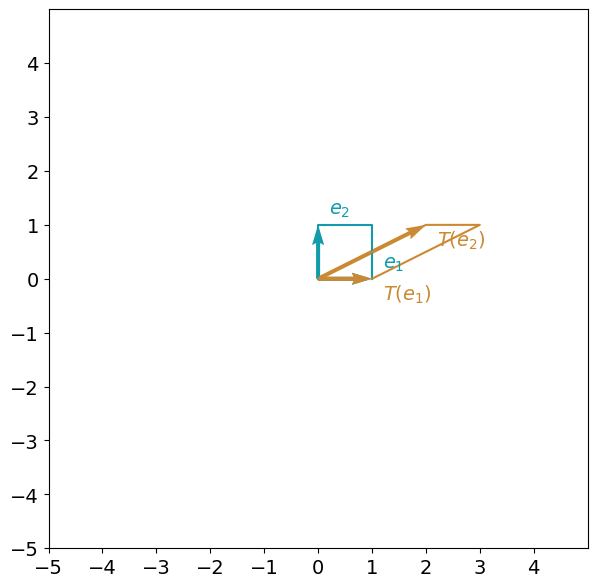

In [21]:
utils.plot_transformation(lambda v: T_hshear(2, v), e1,e2)

<a name="2.5"></a>
### 2.5 Rotation

To rotate a vector in the plane by an angle of $\theta$ (radians), the matrix related to this transformation is given by:


$$M = \begin{bmatrix} \cos \theta & - \sin \theta \\ \sin \theta & \cos \theta \end{bmatrix} $$

<a name="ex03"></a>
### Exercise 3

You will implement the function `T_rotation` that inputs an angle in radians, $\theta$, a vector $v$, and performs a rotation by $\theta$ counterclockwise.

In [22]:
# GRADED FUNCTION: T_rotation
def T_rotation(theta, v):
    """
    Performs a 2D rotation transformation on an array v using a rotation angle theta.

    Args:
        theta (float): The rotation angle in radians.
        v (np.array): The array to be rotated.

    Returns:
        np.array: The rotated array.
    """
    
    ### START CODE HERE ###
    # Define the transformation matrix
    T = np.array([[np.cos(theta),-np.sin(theta)], [np.sin(theta),np.cos(theta)]])
    
    # Compute the transformation
    w = T @ v
    
    ### END CODE HERE ###
    
    return w

In [23]:
w3_unittest.test_T_rotation(T_rotation)

 All tests passed


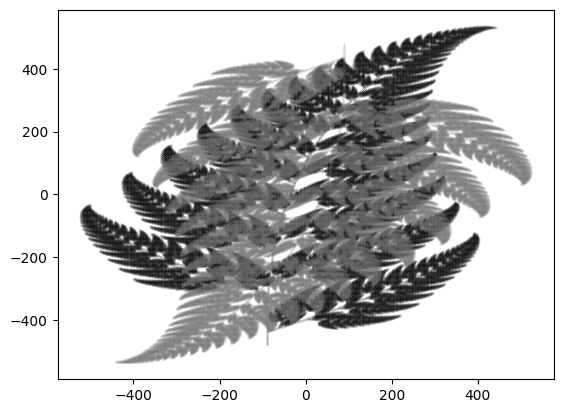

In [24]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black') 
plt.scatter(T_rotation(np.pi,img)[0], T_rotation(np.pi,img)[1], s = 0.001, color = 'grey')

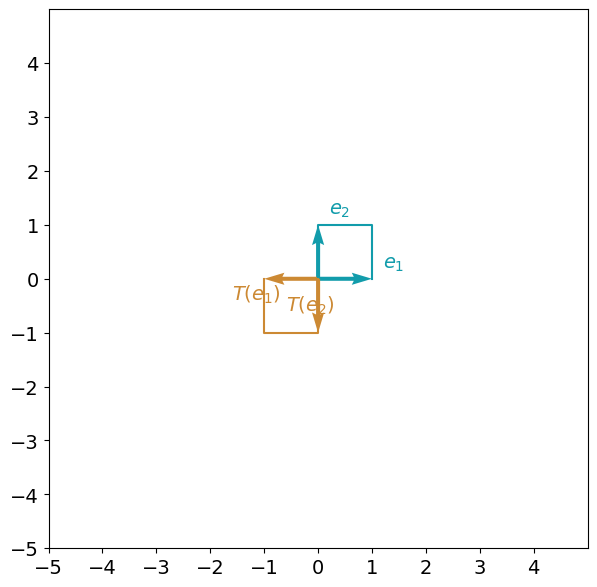

In [25]:
utils.plot_transformation(lambda v: T_rotation(np.pi, v), e1,e2)

<a name="ex04"></a>
### Exercise 4

In the last exercise of this section, you will implement a function that rotates by an angle of $\theta$ and stretches by a factor of $a$. Remember that if $T_{\text{stretch}}$ is the stretching transformation and $T_{\text{rotation}}$ is the rotation then 

$$T_{\text{rotation and stretch}} (v) = \left(T_{\text{rotation}} \circ T_{\text{stretch}}\right) (v) = T_{\text{rotation}} \left(T_{\text{stretch}} \left(v \right) \right).$$

So to perform both transformations, you must multiply the corresponding matrices!

In [26]:
def T_rotation_and_stretch(theta, a, v):
    """
    Performs a combined 2D rotation and stretching transformation on an array v using a rotation angle theta and a stretching factor a.

    Args:
        theta (float): The rotation angle in radians.
        a (float): The stretching factor.
        v (np.array): The array to be transformed.

    Returns:
        np.array: The transformed array.
    """
    ### START CODE HERE ###

    rotation_T = np.array([[np.cos(theta),-np.sin(theta)], [np.sin(theta),np.cos(theta)]])
    stretch_T = np.array([[a,0], [0,a]])

    w = stretch_T @ (rotation_T @ v)

    ### END CODE HERE ###

    return w


In [27]:
w3_unittest.test_T_rotation_and_stretch(T_rotation_and_stretch)

 All tests passed


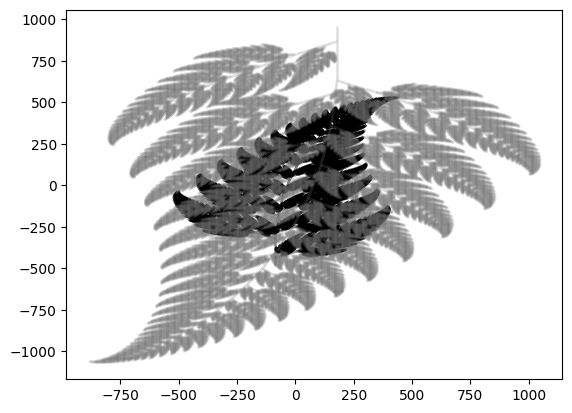

In [28]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black') 
plt.scatter(T_rotation_and_stretch(np.pi,2,img)[0], T_rotation_and_stretch(np.pi,2,img)[1], s = 0.001, color = 'grey')

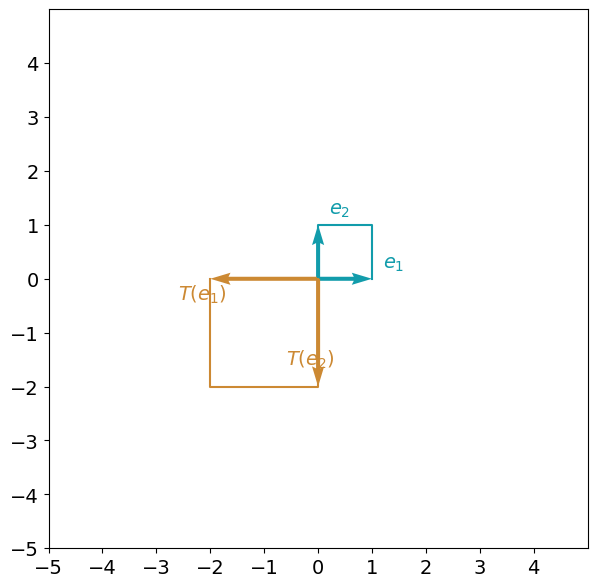

In [29]:
utils.plot_transformation(lambda v: T_rotation_and_stretch(np.pi, 2, v), e1,e2)

<a name="3"></a>
## 3 - Neural Networks


In this part of the assignment you will: 

- Implement a neural network with a single perceptron and two input nodes for linear regression
- Implement forward propagation using matrix multiplication


*Note*: Backward propagation with the parameters update requires understanding of Calculus. It is discussed in details in the Course "Calculus" (Course 2 in the Specialization "Mathematics for Machine Learning"). In this assignment backward propagation and parameters update functions are hidden.

<a name="3.1"></a>
### 3.1 - Linear Regression


**Linear regression** is a linear approach for modelling the relationship between a scalar response (**dependent variable**) and one or more explanatory variables (**independent variables**). You will work with a linear regression with $2$ independent variables.

Linear regression model with two independent variables $x_1$, $x_2$ can be written as

$$\hat{y} = w_1x_1 + w_2x_2 + b = Wx + b,\tag{6}$$

where $Wx$ is the dot product of the input vector $x = \begin{bmatrix} x_1 & x_2\end{bmatrix}$ and parameters vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$, scalar parameter $b$ is the intercept. 

The goal is the same - find the "best" parameters $w_1$, $w_2$ and $b$ such the differences between original values $y_i$ and predicted values $\hat{y}_i$ are minimum.

You can use a neural network model to do that. Matrix multiplication will be in the core of the model!

<a name="3.2"></a>
### 3.2 - Neural Network Model with a Single Perceptron and Two Input Nodes

Again, you will use only one perceptron, but with two input nodes shown in the following scheme:

<img src="images/nn_model_linear_regression_multiple.png" style="width:420px;">

The perceptron output calculation for a training example $x = \begin{bmatrix} x_1& x_2\end{bmatrix}$ can be written with dot product:

$$z = w_1x_1 + w_2x_2+ b = Wx + b$$

where weights are in the vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$ and bias $b$ is a scalar. The output layer will have the same single node $\hat{y}= z$.

Organise all training examples in a matrix $X$ of a shape ($2 \times m$), putting $x_1$ and $x_2$ into columns. Then matrix multiplication of $W$ ($1 \times 2$) and $X$ ($2 \times m$) will give a ($1 \times m$) vector

$$WX = 
\begin{bmatrix} w_1 & w_2\end{bmatrix} 
\begin{bmatrix} 
x_1^{(1)} & x_1^{(2)} & \dots & x_1^{(m)} \\ 
x_2^{(1)} & x_2^{(2)} & \dots & x_2^{(m)} \\ \end{bmatrix}
=\begin{bmatrix} 
w_1x_1^{(1)} + w_2x_2^{(1)} & 
w_1x_1^{(2)} + w_2x_2^{(2)} & \dots & 
w_1x_1^{(m)} + w_2x_2^{(m)}\end{bmatrix}.$$

And the model can be written as

\begin{align}
Z &=  W X + b,\\
\hat{Y} &= Z,
\tag{8}\end{align}

where $b$ is broadcasted to the vector of a size ($1 \times m$). These are the calculations to perform in the forward propagation step.


Now, you can compare the resulting vector of the predictions $\hat{Y}$ ($1 \times m$) with the original vector of data $Y$. This can be done with the so called **cost function** that measures how close your vector of predictions is to the training data. It evaluates how well the parameters $w$ and $b$ work to solve the problem. There are many different cost functions available depending on the nature of your problem. For your simple neural network you can calculate it as:

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.\tag{5}$$

The aim is to minimize the cost function during the training, which will minimize the differences between original values $y_i$ and predicted values $\hat{y}_i$ (division by $2m$ is taken just for scaling purposes).

When your weights were just initialized with some random values, and no training was done yet, you can't expect good results.

The next step is to adjust the weights and bias, in order to minimize the cost function. This process is called **backward propagation** and is done iteratively: you update the parameters with a small change and repeat the process.

*Note*: Backward propagation is not covered in this Course - it will be discussed in the next Course of this Specialization.

The general **methodology** to build a neural network is to:
1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation (calculate the perceptron output),
    - Implement backward propagation (to get the required corrections for the parameters),
    - Update parameters.
4. Make predictions.

<a name="3.3"></a>
### 3.3 Parameters of the Neural Network

The neural network you will be working with has $3$ parameters. Two weights and one bias, you will start initalizing these parameters as some random numbers, so the algorithm can start at some point. The parameters will be stored in a dictionary.

In [30]:
parameters = utils.initialize_parameters(2)
print(parameters)

{'W': array([[0.00701252, 0.00564619]]), 'b': array([[0.]])}


<a name="3.4"></a>
### 3.4 Forward propagation

<a name="ex05"></a>
### Exercise 5

Implement `forward_propagation()`.

**Instructions**:
- Look at the mathematical representation of your model:
\begin{align}
Z &=  W X + b\\
\hat{Y} &= Z,
\end{align}
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute `Z` multiplying arrays `W`, `X` and adding vector `b`. Set the prediction array $A$ equal to $Z$.  

In [31]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m), where n_x is the dimension input (in our example is 2) and m is the number of training samples
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    Y_hat -- The output of size (1, m)
    """
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]
    
    # Implement Forward Propagation to calculate Z.
    ### START CODE HERE ### (~ 2 lines of code)
    Z = W @ X + b
    Y_hat = Z
    ### END CODE HERE ###
    

    return Y_hat

In [32]:
w3_unittest.test_forward_propagation(forward_propagation)

 All tests passed


<a name="3.5"></a>
### 3.5 Defining the cost function

The cost function used to traing this model is 

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

The next implementation is not graded.

In [33]:
def compute_cost(Y_hat, Y):
    """
    Computes the cost function as a sum of squares
    
    Arguments:
    Y_hat -- The output of the neural network of shape (n_y, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    cost -- sum of squares scaled by 1/(2*number of examples)
    
    """
    # Number of examples.
    m = Y.shape[1]

    # Compute the cost function.
    cost = np.sum((Y_hat - Y)**2)/(2*m)
    
    return cost

<a name="ex06"></a>
### Exercise 6

Now you're ready to implement your neural network. The next function will implement the training process and it will return the updated parameters dictionary where you will be able to make predictions.

In [34]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, num_iterations=1000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (1, number of examples)
    num_iterations -- number of iterations in the loop
    print_cost -- if True, print the cost every iteration
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to make predictions.
    """
    
    n_x = X.shape[0]
    
    # Initialize parameters
    parameters = utils.initialize_parameters(n_x) 
    
    # Loop
    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (~ 2 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "Y_hat".
        Y_hat = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "Y_hat, Y". Outputs: "cost".
        cost = compute_cost(Y_hat, Y)
        ### END CODE HERE ###
        
        
        # Parameters update.
        parameters = utils.train_nn(parameters, Y_hat, X, Y, learning_rate = 0.001) 
        
        # Print the cost every iteration.
        if print_cost:
            if i%100 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [35]:
w3_unittest.test_nn_model(nn_model)

 All tests passed


<a name="3.6"></a>
### 3.6 - Training the neural network

Now let's load a dataset to train the neural network.

In [36]:
df = pd.read_csv("data/toy_dataset.csv")

In [37]:
df.head()

,x1,x2,y
0,-0.816777,-0.524620,-0.940299
1,-0.670257,1.525658,0.754702
2,-0.163599,0.268567,0.034551
3,2.141420,0.428381,1.802543
4,0.163608,0.257243,0.314790


Let's first turn the data into a numpy array that we can pass to our function.

In [38]:
X = np.array(df[['x1','x2']]).T
Y = np.array(df['y']).reshape(1,-1)

Run the next block to update the parameters dictionary with the fitted weights.

In [39]:
parameters = nn_model(X,Y, num_iterations = 5000, print_cost= True)

Cost after iteration 0: 0.477455
Cost after iteration 100: 0.394165
Cost after iteration 200: 0.325442
Cost after iteration 300: 0.268738
Cost after iteration 400: 0.221952
Cost after iteration 500: 0.183348
Cost after iteration 600: 0.151495
Cost after iteration 700: 0.125213
Cost after iteration 800: 0.103528
Cost after iteration 900: 0.085635
Cost after iteration 1000: 0.070872
Cost after iteration 1100: 0.058690
Cost after iteration 1200: 0.048639
Cost after iteration 1300: 0.040346
Cost after iteration 1400: 0.033503
Cost after iteration 1500: 0.027857
Cost after iteration 1600: 0.023198
Cost after iteration 1700: 0.019354
Cost after iteration 1800: 0.016182
Cost after iteration 1900: 0.013565
Cost after iteration 2000: 0.011406
Cost after iteration 2100: 0.009624
Cost after iteration 2200: 0.008154
Cost after iteration 2300: 0.006941
Cost after iteration 2400: 0.005940
Cost after iteration 2500: 0.005114
Cost after iteration 2600: 0.004433
Cost after iteration 2700: 0.003871
Cost

<a name="4"></a>
## 4 - Make your predictions!

Now that you have the fitted parameters, you are able to predict any value with your neural network! You just need to perform the following computation:

$$ Z = W X + b$$ 

Where $W$ and $b$ are in the parameters dictionary.

<a name="ex07"></a>
### Exercise 7

Now you will make the predictor function. It will input a parameters dictionary, a set of points X and output the set of predicted values. 

In [40]:
# GRADED FUNCTION: predict

def predict(X, parameters):

    W = parameters['W']
    b = parameters['b']

    Z = np.dot(W, X) + b

    return Z

In [41]:
y_hat = predict(X,parameters)

In [42]:
df['y_hat'] = y_hat[0]

Now let's check some predicted values versus the original ones:

In [43]:
for i in range(10):
    print(f"(x1,x2) = ({df.loc[i,'x1']:.2f}, {df.loc[i,'x2']:.2f}): Actual value: {df.loc[i,'y']:.2f}. Predicted value: {df.loc[i,'y_hat']:.2f}")

(x1,x2) = (-0.82, -0.52): Actual value: -0.94. Predicted value: -0.95
(x1,x2) = (-0.67, 1.53): Actual value: 0.75. Predicted value: 0.68
(x1,x2) = (-0.16, 0.27): Actual value: 0.03. Predicted value: 0.09
(x1,x2) = (2.14, 0.43): Actual value: 1.80. Predicted value: 1.78
(x1,x2) = (0.16, 0.26): Actual value: 0.31. Predicted value: 0.30
(x1,x2) = (-0.80, 2.07): Actual value: 1.12. Predicted value: 0.99
(x1,x2) = (-2.64, -1.36): Actual value: -2.85. Predicted value: -2.82
(x1,x2) = (1.04, -0.38): Actual value: 0.45. Predicted value: 0.43
(x1,x2) = (0.15, 0.19): Actual value: 0.25. Predicted value: 0.25
(x1,x2) = (-1.57, -0.34): Actual value: -1.31. Predicted value: -1.33


Pretty good, right? Congratulations! You have finished the W3 assignment!